https://blog.csdn.net/made_in_china_too/article/details/81675402
【Keras】word2vec_skipgram

In [1]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.preprocessing.text import Tokenizer, one_hot
from sklearn.metrics.pairwise import cosine_distances
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import nltk
import numpy as np
import operator


Using TensorFlow backend.


In [3]:
np.random.seed(2018)

BATCH_SIZE = 128
NUM_EPOCHS = 20

lines = []
fin = open("./爱丽丝梦游仙境_英文版.txt", "r")
for line in fin:
    line = line.strip()
    if len(line) == 0:
        continue
    lines.append(line)
fin.close()

sents = nltk.sent_tokenize(" ".join(lines)) # 以句子为单位进行划分

tokenizer = Tokenizer(5000)  # use top 5000 words only
tokenizer.fit_on_texts(sents)
vocab_size = len(tokenizer.word_counts) + 1
sequences = tokenizer.texts_to_sequences(sents)


In [22]:
xs = []
ys = []
for sequence in sequences:
    triples = list(nltk.trigrams(sequence)) # 该句子数字序列中，每3个连续的数字组成一个tuple并返回
    w_lefts = [x[0] for x in triples]  
    w_centers = [x[1] for x in triples]
    w_rights = [x[2] for x in triples]
    xs.extend(w_centers)
    ys.extend(w_lefts)
    xs.extend(w_centers)
    ys.extend(w_rights)

In [26]:
ohe = OneHotEncoder(n_values=vocab_size)
X = ohe.fit_transform(np.array(xs).reshape(-1, 1)).todense() 
Y = ohe.fit_transform(np.array(ys).reshape(-1, 1)).todense()


d:\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:326: DeprecationWarning: Passing 'n_values' is deprecated in version 0.20 and will be removed in 0.22. You can use the 'categories' keyword instead. 'n_values=n' corresponds to 'categories=[range(n)]'.
  warnings.warn(msg, DeprecationWarning)
d:\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:326: DeprecationWarning: Passing 'n_values' is deprecated in version 0.20 and will be removed in 0.22. You can use the 'categories' keyword instead. 'n_values=n' corresponds to 'categories=[range(n)]'.
  warnings.warn(msg, DeprecationWarning)


In [52]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.3,
                                                random_state=42)
print(Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape)


(34503, 2652) (14787, 2652) (34503, 2652) (14787, 2652)


In [53]:
model = Sequential()
model.add(Dense(300, input_shape=(Xtrain.shape[1],)))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(Ytrain.shape[1]))
model.add(Activation("softmax"))

model.compile(optimizer="Nadam", loss="categorical_crossentropy", 
              metrics=["accuracy"])


In [55]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 300)               795900    
_________________________________________________________________
activation_1 (Activation)    (None, 300)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 2652)              798252    
_________________________________________________________________
activation_2 (Activation)    (None, 2652)              0         
Total params: 1,594,152
Trainable params: 1,594,152
Non-trainable params: 0
_________________________________________________________________
None


In [104]:
# history = model.fit(Xtrain, Ytrain, batch_size=BATCH_SIZE, 
#                     epochs=15, verbose=1,
#                     validation_data=(Xtest, Ytest))
temp = model.predict(Xtrain[0])
# temp = np.array(Ytrain[0])
print(np.where(temp==np.max(temp)))
temp[0][2281]

(array([0], dtype=int64), array([1], dtype=int64))


0.0013195103

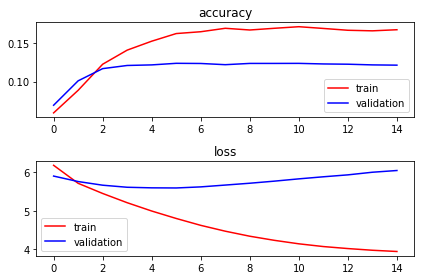

14752/14787 [============================>.] - ETA: 0sTest score: 6.040, accuracy: 0.121


In [92]:
plt.subplot(211)
plt.title("accuracy")
plt.plot(history.history["acc"], color="r", label="train")
plt.plot(history.history["val_acc"], color="b", label="validation")
plt.legend(loc="best")

plt.subplot(212)
plt.title("loss")
plt.plot(history.history["loss"], color="r", label="train")
plt.plot(history.history["val_loss"], color="b", label="validation")
plt.legend(loc="best")

plt.tight_layout()
plt.show()

# evaluate model
score = model.evaluate(Xtest, Ytest, verbose=1)
print("Test score: {:.3f}, accuracy: {:.3f}".format(score[0], score[1]))


In [59]:
word2idx = tokenizer.word_index
idx2word = {v:k for k, v in word2idx.items()}


In [62]:
W, b = model.layers[0].get_weights()

In [67]:
idx2emb = {}    
for word in word2idx.keys():
    wid = word2idx[word]
    vec_in = ohe.fit_transform(np.array(wid).reshape(-1, 1)).todense()
    vec_emb = np.dot(vec_in, W)
    idx2emb[wid] = vec_emb


d:\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:326: DeprecationWarning: Passing 'n_values' is deprecated in version 0.20 and will be removed in 0.22. You can use the 'categories' keyword instead. 'n_values=n' corresponds to 'categories=[range(n)]'.
  warnings.warn(msg, DeprecationWarning)
d:\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:326: DeprecationWarning: Passing 'n_values' is deprecated in version 0.20 and will be removed in 0.22. You can use the 'categories' keyword instead. 'n_values=n' corresponds to 'categories=[range(n)]'.
  warnings.warn(msg, DeprecationWarning)
d:\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:326: DeprecationWarning: Passing 'n_values' is deprecated in version 0.20 and will be removed in 0.22. You can use the 'categories' keyword instead. 'n_values=n' corresponds to 'categories=[range(n)]'.
  warnings.warn(msg, DeprecationWarning)
d:\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:326: De

In [74]:
for word in ["stupid", "wonderful", "succeeded"]:
    wid = word2idx[word]
    source_emb = idx2emb[wid]
    distances = []
    for i in range(1, vocab_size):
        if i == wid:
            continue
        target_emb = idx2emb[i]
        distances.append(
            (
             (wid, i),
             cosine_distances(source_emb, target_emb)
            )
        )
    sorted_distances = sorted(distances, key=operator.itemgetter(1))[0:10]
    predictions = [idx2word[x[0][1]] for x in sorted_distances]
    print("{:s} => {:s}".format(word, ", ".join(predictions)))


stupid => stairs, flying, knelt, trickling, hurrying, flung, axis, likes, swallowing, simpleton
wonderful => reminding, underneath, kissed, save, calling, remembering, licking, first, dried, leaning
succeeded => somehow, known, powdered, pencils, fluttered, conversations, alarm, chains, harm, contradicted
